In [3]:
from midas_utils import midas
from detr_utils import detr

Using cache found in /home/akirchme/.cache/torch/hub/intel-isl_MiDaS_master
Using cache found in /home/akirchme/.cache/torch/hub/intel-isl_MiDaS_master


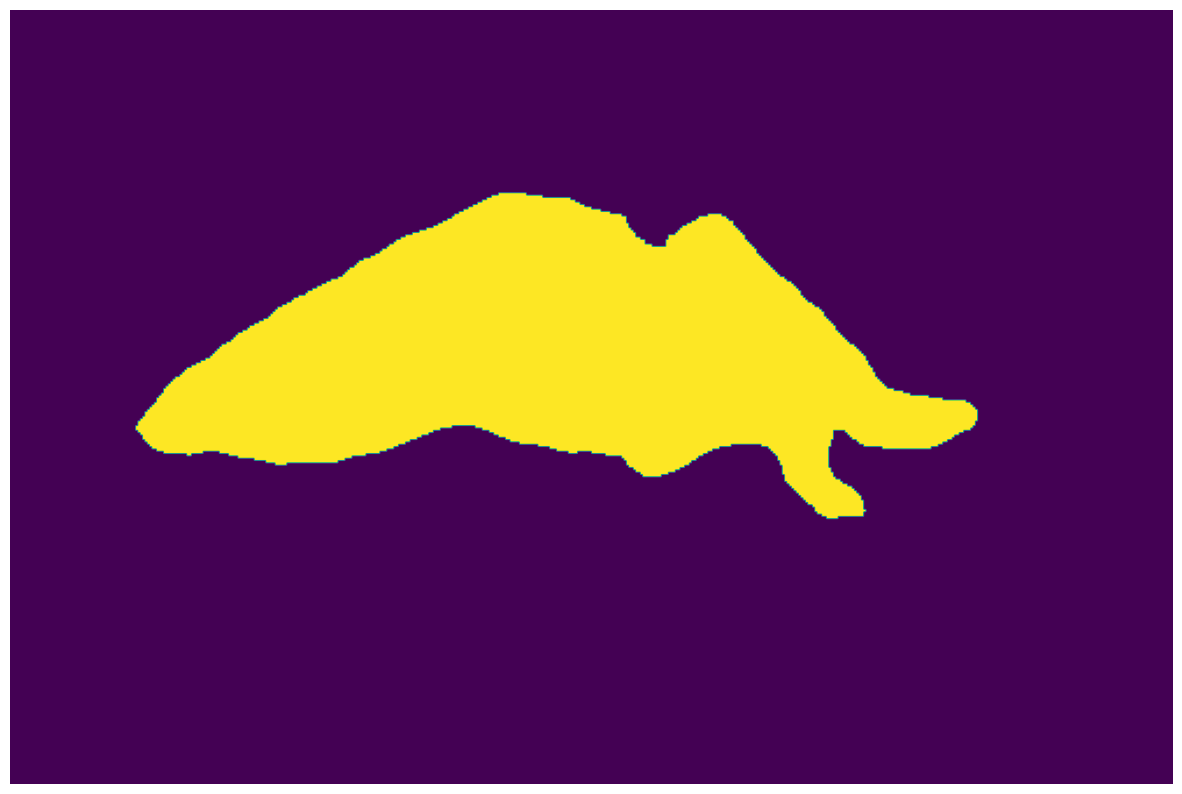

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

cub_path = '/home/akirchme/data/CUB'
image_fn = '084.Red_legged_Kittiwake/Red_Legged_Kittiwake_0001_795394.jpg'
image = Image.open(f'{cub_path}/images/{image_fn}')
#url = "http://images.cocodataset.org/val2017/000000281759.jpg"
#im = Image.open(requests.get(url, stream=True).raw)

panoptic_seg = detr(image, mode='fg')
plt.figure(figsize=(15,15))
plt.imshow(panoptic_seg)
plt.axis('off')
plt.show()

In [3]:
import glob
from tqdm import tqdm 
import cv2

cub_folder = '/home/akirchme/data/CUB'

def generate_fg_frames(folder, in_name, out_name):
    frames = sorted([file for file in glob.iglob(f'{folder}/{in_name}/**/*.jpg', recursive=True)])
    imgs = [cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB) for f in tqdm(frames, desc="Reading frames")]
    for i in tqdm(range(len(imgs)), desc="Estimating fg"):
        out_frame = frames[i].replace(in_name, out_name)
        parent = os.path.dirname(out_frame)
        if os.path.exists(out_frame):
            continue
        if not os.path.exists(parent):
            os.makedirs(parent, exist_ok=True)
        img = np.array(imgs[i], dtype=np.uint8)
        depth = extract_foreground(Image.fromarray(img)).squeeze(-1)
        img[depth == 0] = 0
        cv2.imwrite(out_frame, img)
        
def generate_depth_frames(folder, in_name, out_name):
    frames = sorted([file for file in glob.iglob(f'{folder}/{in_name}/**/*.jpg', recursive=True)])
    imgs = [cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2RGB) for f in tqdm(frames, desc="Reading frames")]
    for i in tqdm(range(len(imgs)), desc="Estimating depth"):
        out_frame = frames[i].replace(in_name, out_name)
        parent = os.path.dirname(out_frame)
        if os.path.exists(out_frame):
            continue
        if not os.path.exists(parent):
            os.makedirs(parent, exist_ok=True)
        depth = midas(imgs[i])
        cv2.imwrite(out_frame, depth)

generate_fg_frames(cub_folder, 'images', 'fg')        
#generate_depth_frames(cub_folder, 'images', 'depth')

Estimating depth: 100%|██████████████████████████████████████████████| 11788/11788 [2:01:40<00:00,  1.61it/s]


In [4]:
generate_depth_frames(cub_folder, 'fg', 'depth_fg')

Estimating depth: 100%|█████████████████████████████████████████████| 11788/11788 [00:00<00:00, 13784.15it/s]
